In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

import warnings
warnings.filterwarnings('ignore')

In [2]:
def unpickle(where_pkl):
    with open(where_pkl, 'rb') as f:
        return pickle.load(f)
    
class Patient:
    def __init__(self, plot_path,assessment_path,baseline_file,files_to_remove,vta_path):
        self.plot_path = plot_path
        self.assessment_path = assessment_path
        self.baseline_file = baseline_file
        self.files_to_remove = files_to_remove
        self.vta_path = vta_path
        
    def pickle(self, where_pkl):
        pickleFile = open(where_pkl, 'wb')
        pickle.dump(self, pickleFile)
        pickleFile.close()
   

In [8]:
def functional_profile(functional_df,destination_folder,vta,day):
   
    os.makedirs(os.path.join(destination_folder,'functional','profiles'),exist_ok=True)
    fig,(ax_p, ax_n) = plt.subplots(1,2, sharey=True, figsize = (18,6))
    positive = functional_df[functional_df.average_value >0 ].sort_values(by='average_value', ascending = False)
    ax_p.scatter(positive.label, positive['abs'],color = '#ff7f00' )
    ax_p.set_xlabel('Brodmann Area')
    ax_p.set_ylabel('Mean functional connection of BA to VAT', weight='bold')
    ax_p.set_xticklabels(positive.label, rotation=70)
    ax_p.set_title('Positive functional correlations to VAT')
    ax_p.yaxis.grid(True, color='gray', linestyle='--')
    ax_p.set_ylim([0,0.160])
    ax_p.yaxis.labelpad = 20

    negative = functional_df[functional_df.average_value <0 ].sort_values(by='average_value',ascending = False)
    ax_n.scatter(negative.label, negative['abs'],color = '#377eb8')
    ax_n.set_xlabel('Brodmann Area')
    ax_n.set_xticklabels(negative.label, rotation=70)
    ax_n.set_title('Negative functional correlations to VAT')
    ax_n.set_ylim([0,0.160])
    ax_n.yaxis.grid(True, color='gray', linestyle='--')

    #plt.suptitle('Functional connectivity profile', y = 1.03)
    fig.subplots_adjust(bottom=0.3)
    directory = os.path.join(destination_folder,'functional','profiles')
    plt.savefig(os.path.join(directory, '{which}_on_{when}'.format(which=vta,when=day.replace('.','_'))),bbox_inches = 'tight')
    fig.subplots_adjust(wspace=0.05, hspace=0)
    return


In [9]:
def plot_funk_profiles(Patient_pickle,Brodmann_path):
    Pat = unpickle(Patient_pickle)
    sorted_code_list = np.load(Pat.plot_path + '/sorted_code_list.npy')
    sorted_code_list = ['VTA_' + "{0:0=2d}".format(i) for i in sorted_code_list]

    dates = np.load(Pat.plot_path + '/sorted_dates.npy')
    
    for i, vta in enumerate(sorted_code_list):
    
        functional = pd.read_csv(os.path.join(Pat.vta_path,vta, 'averaged_z_fingerprint.txt'), sep=' ')
        functional['abs'] = abs(functional['average_value'])
        functional_profile(functional,Pat.plot_path, vta, dates[i])
    
    return

In [10]:
parcellation_path_Brodmann = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/AtlasCollection/Brodmann/Brodmann_known_default.txt'


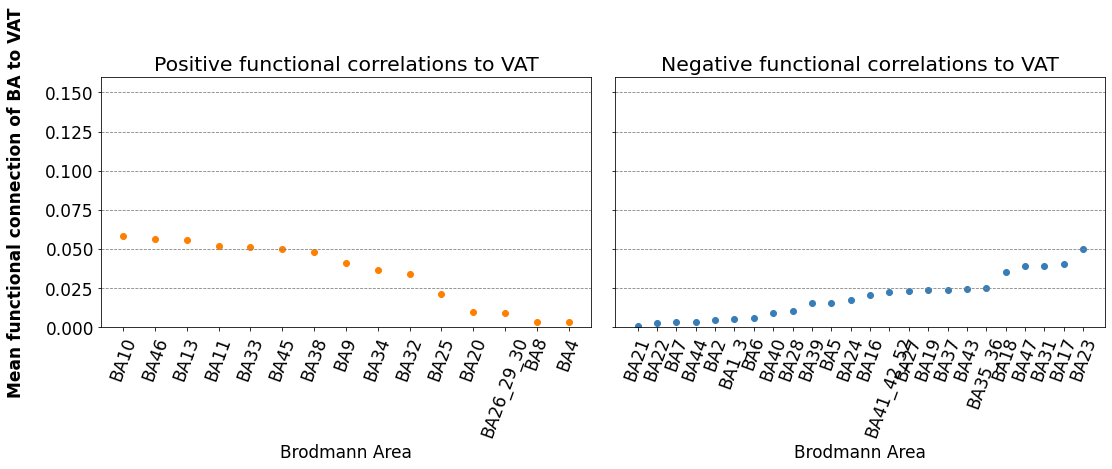

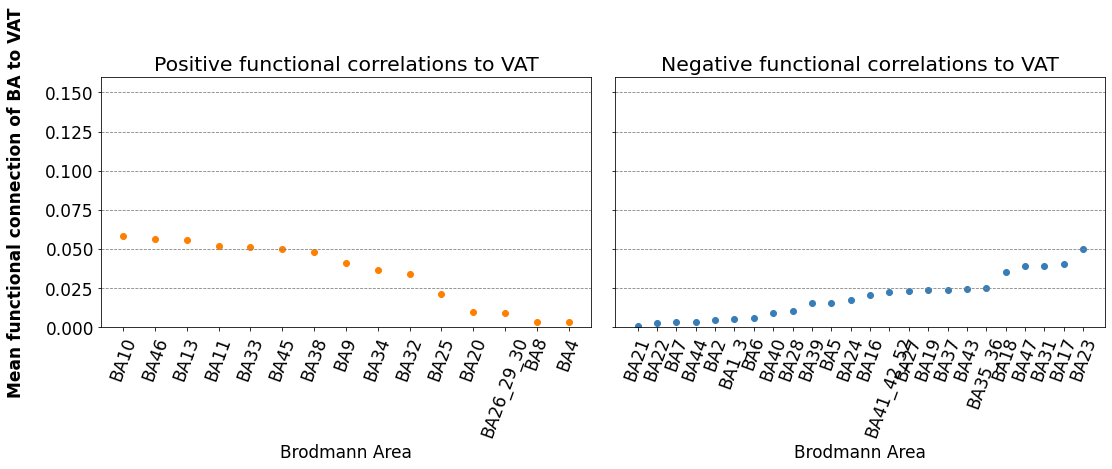

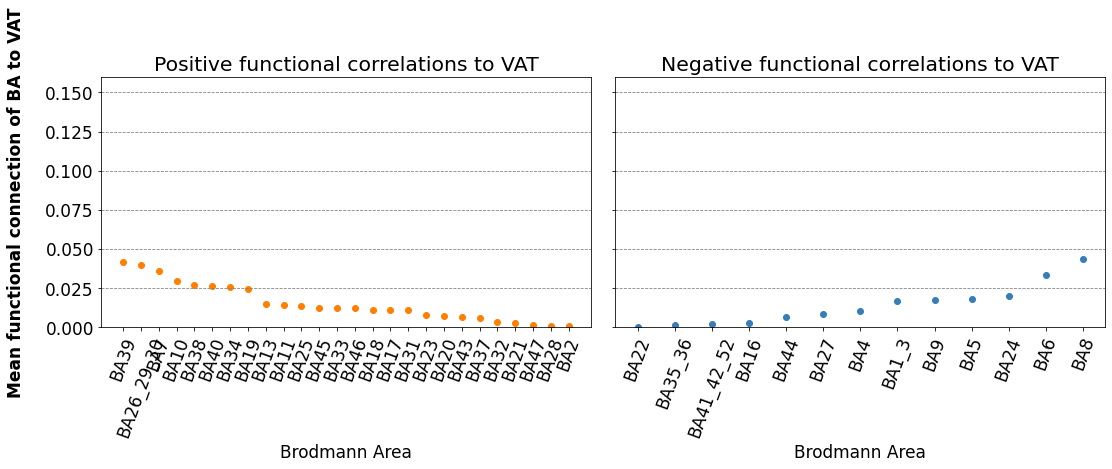

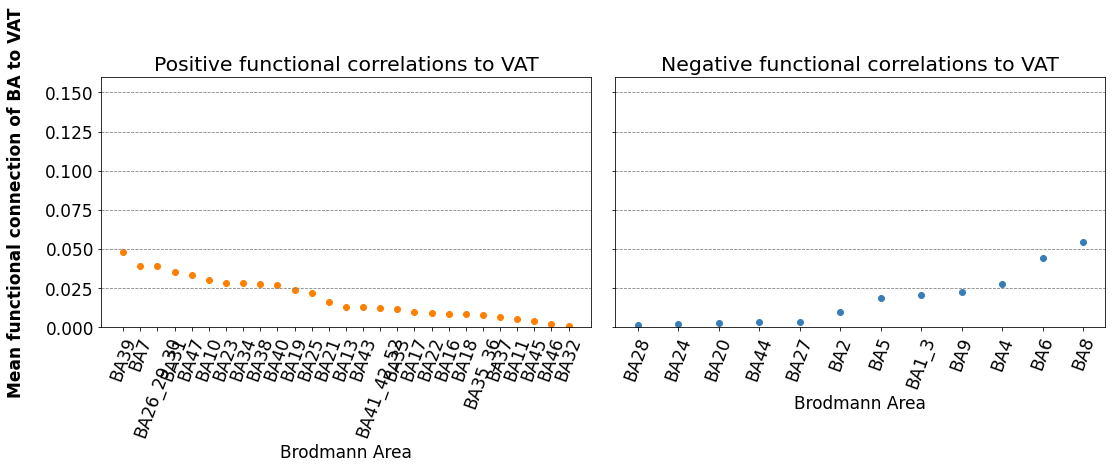

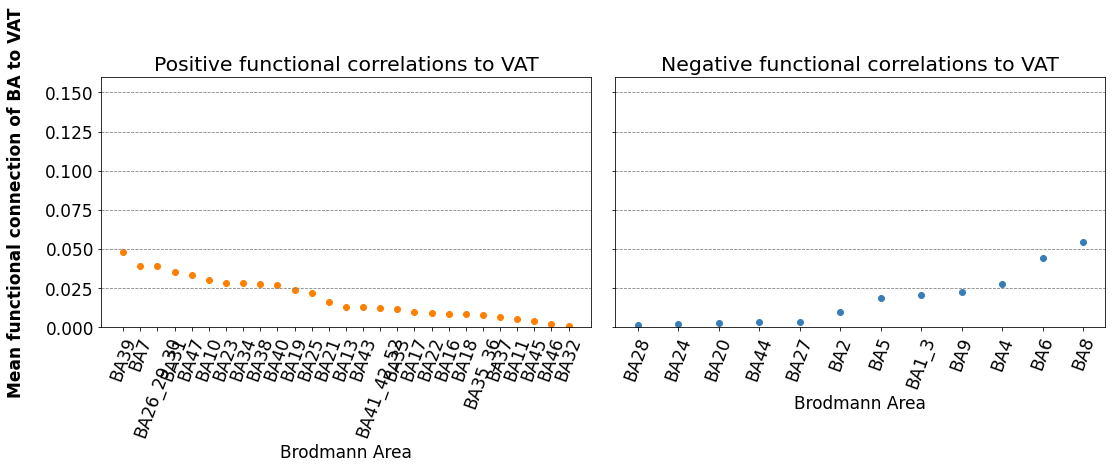

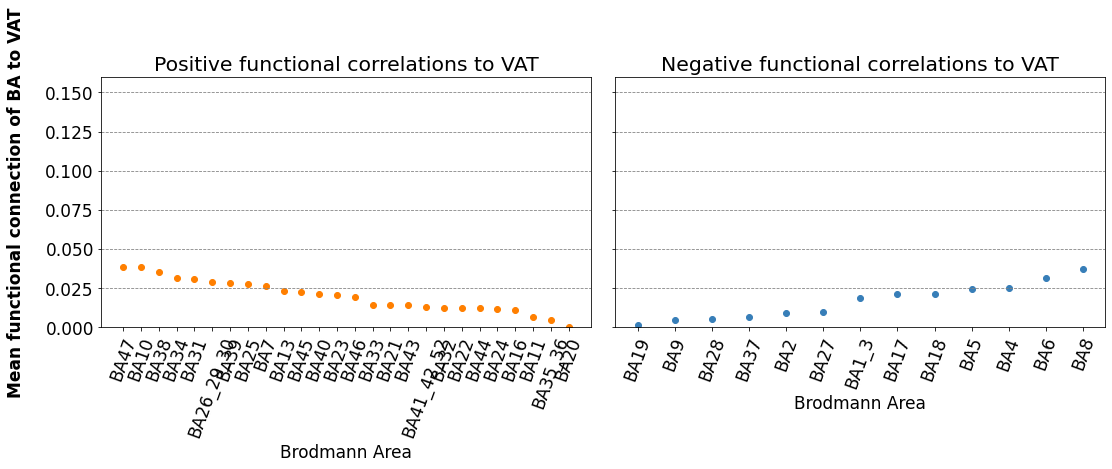

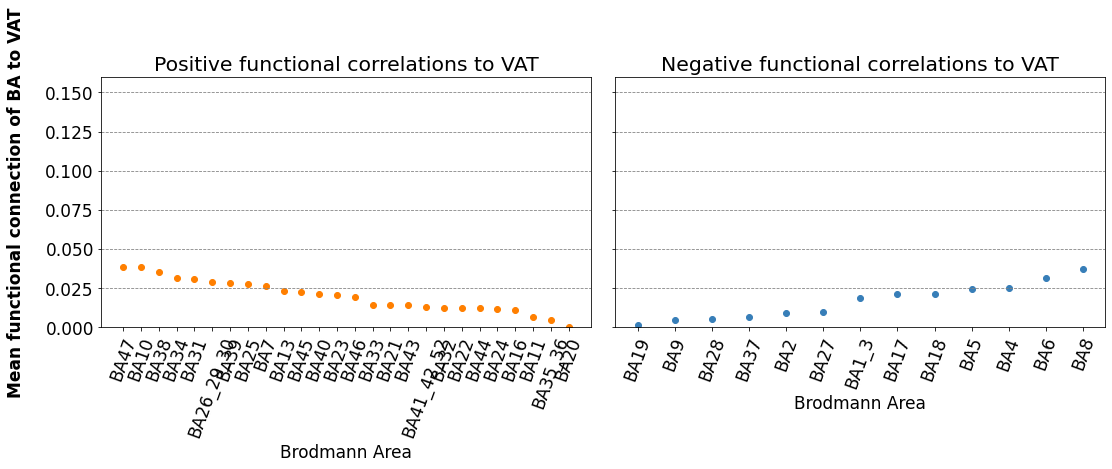

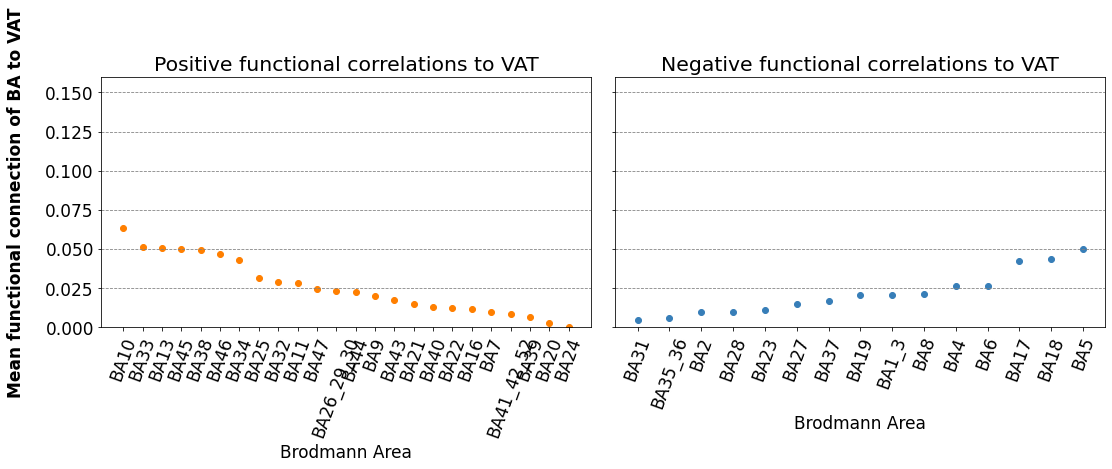

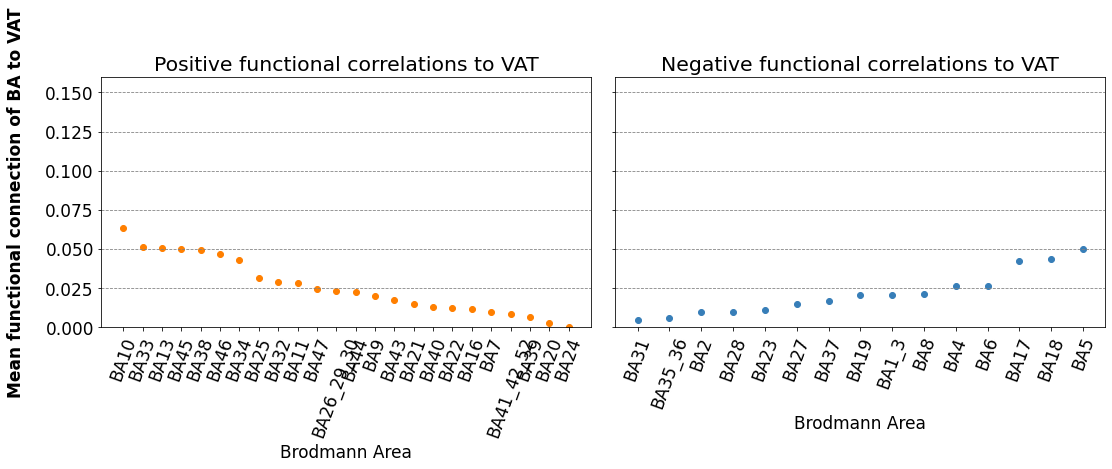

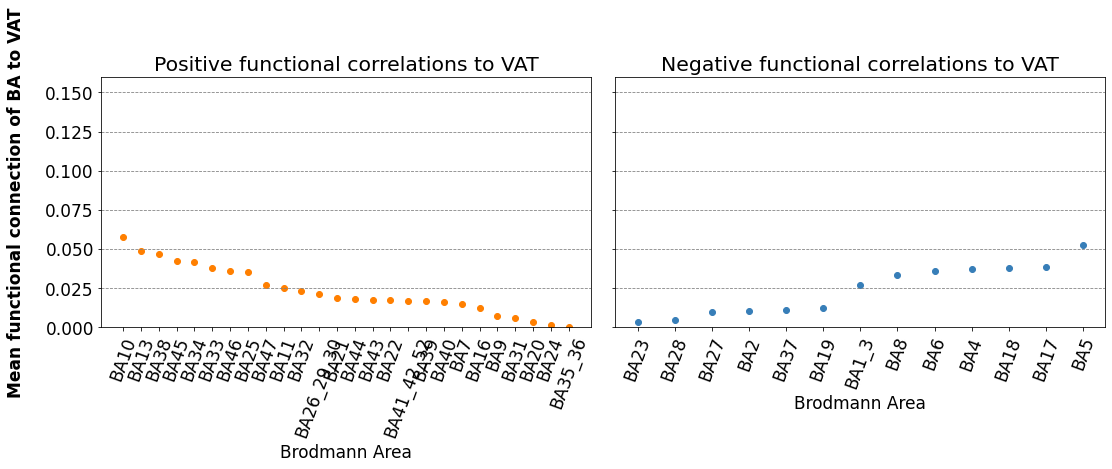

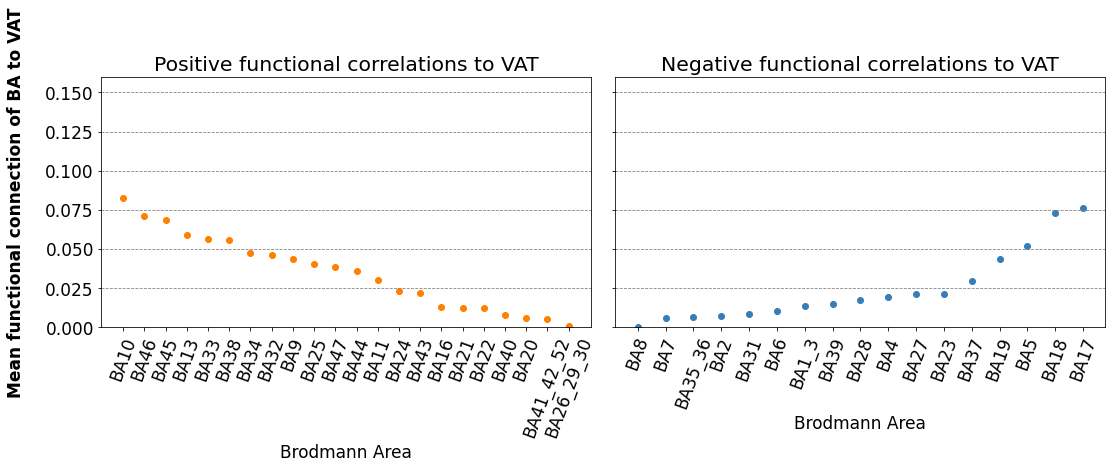

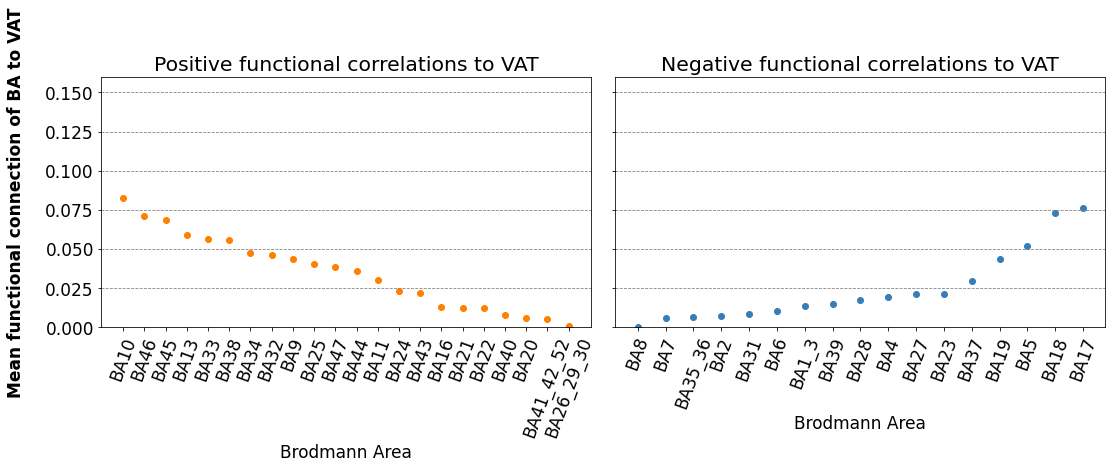

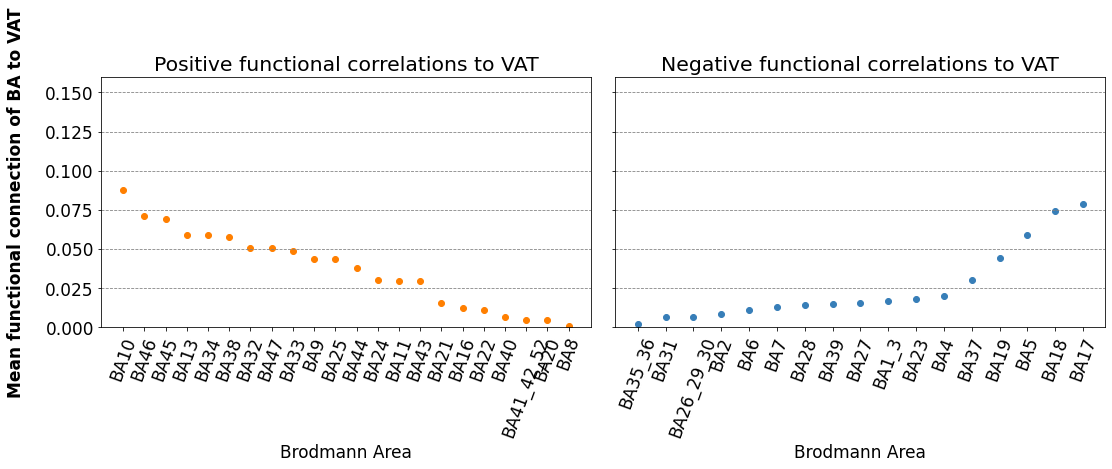

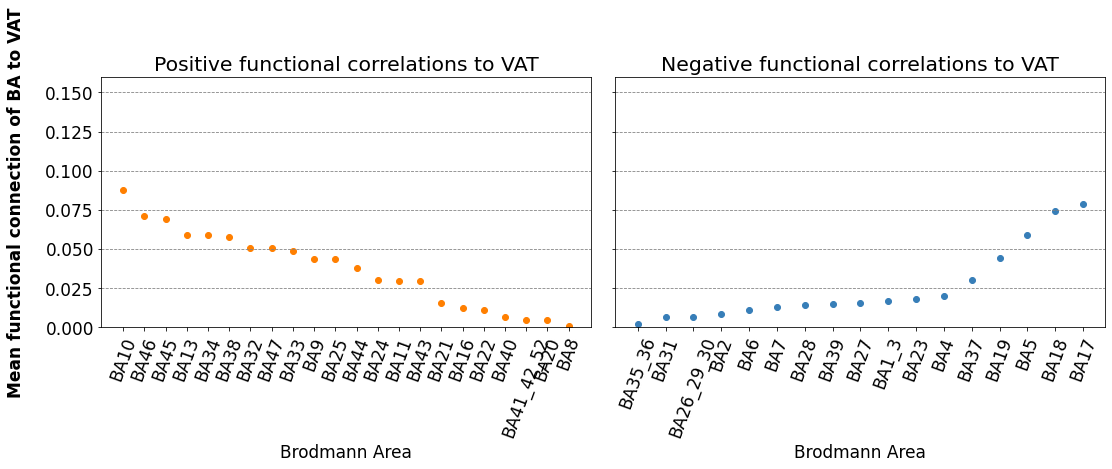

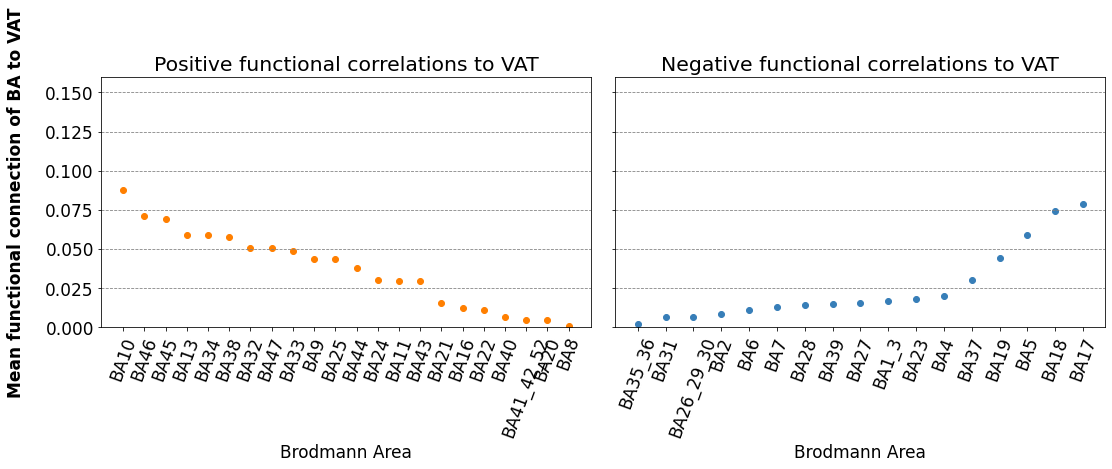

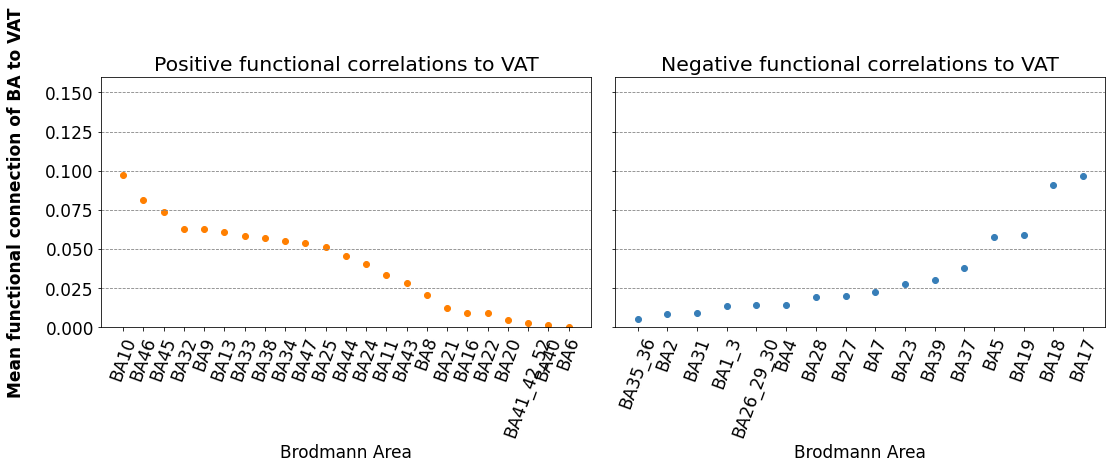

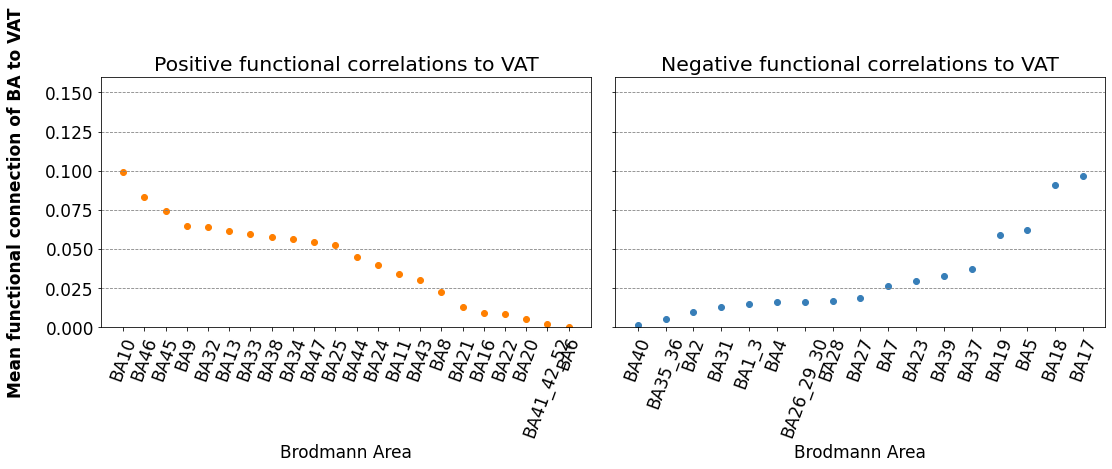

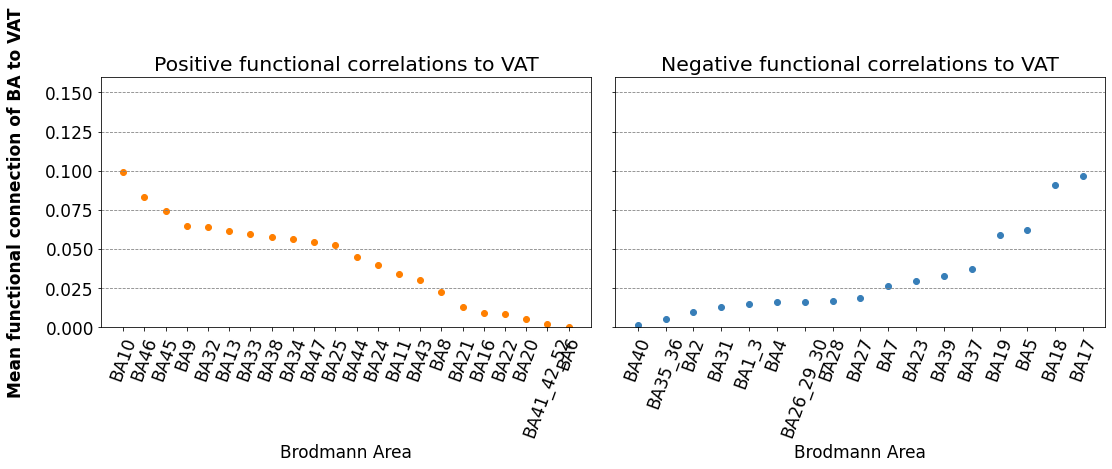

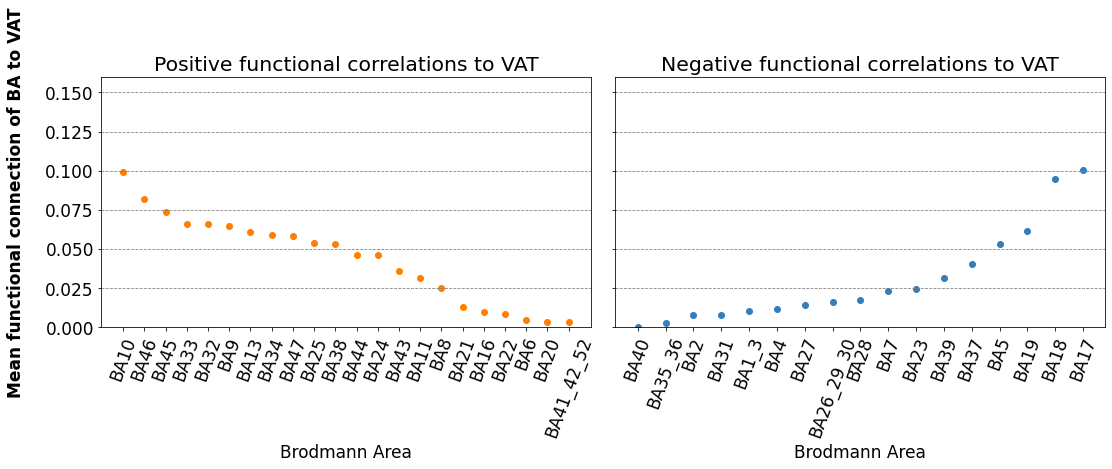

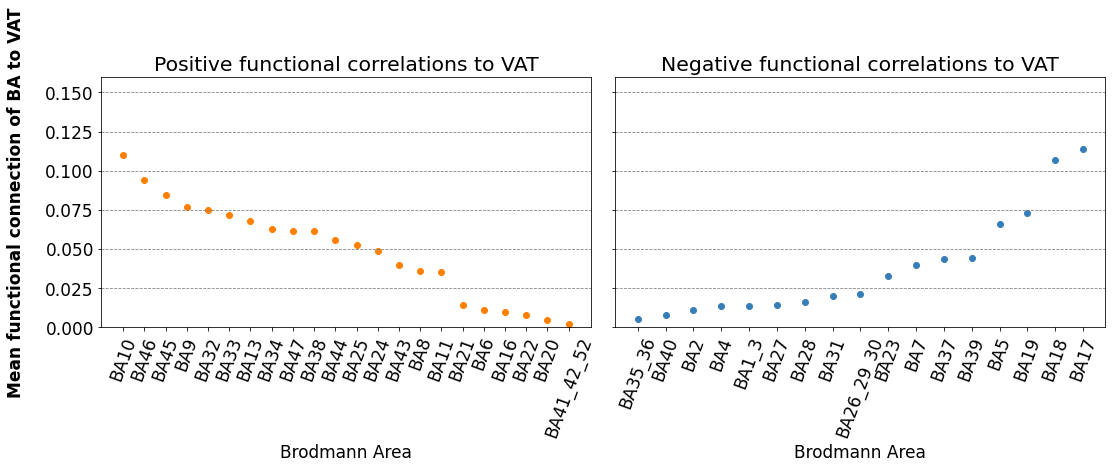

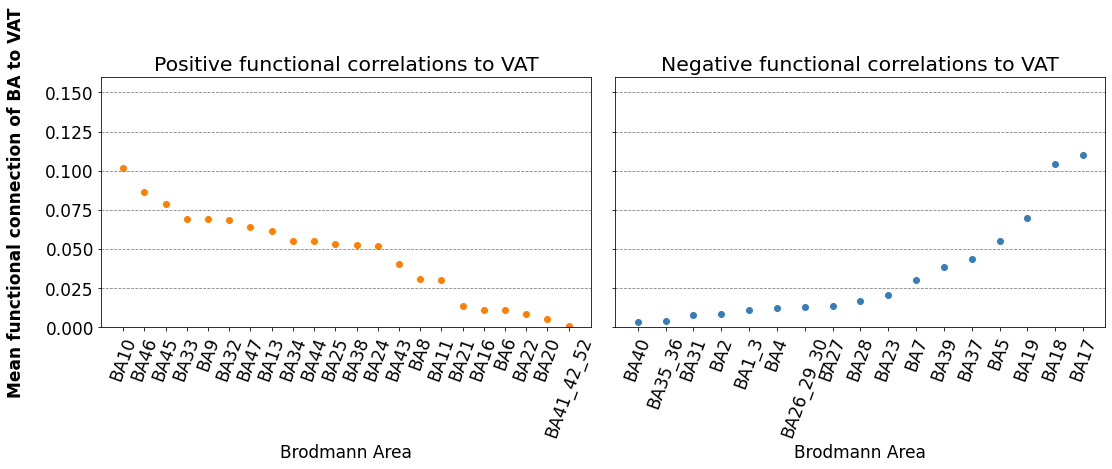

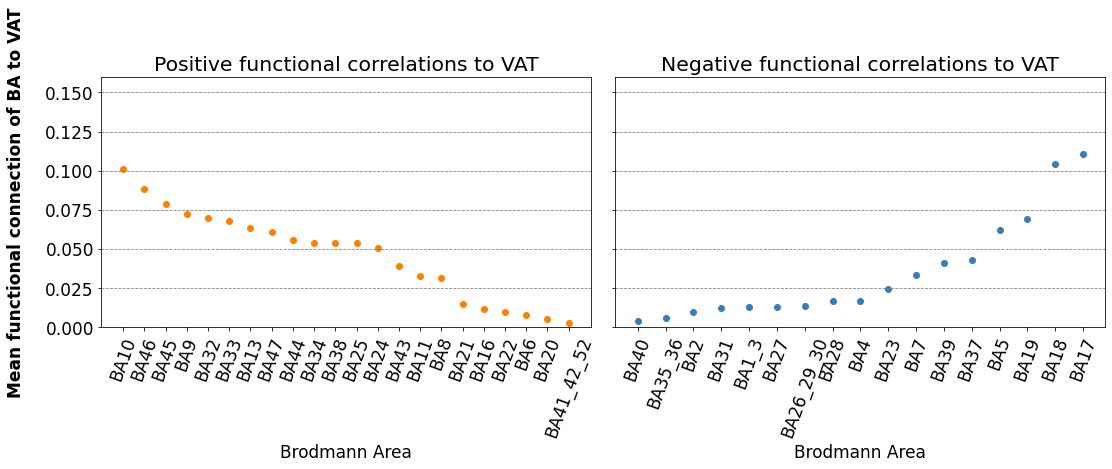

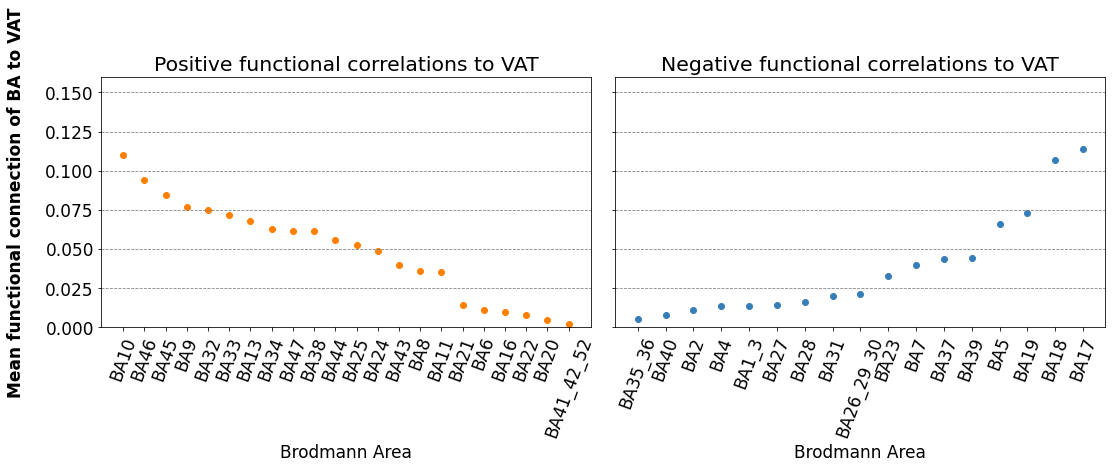

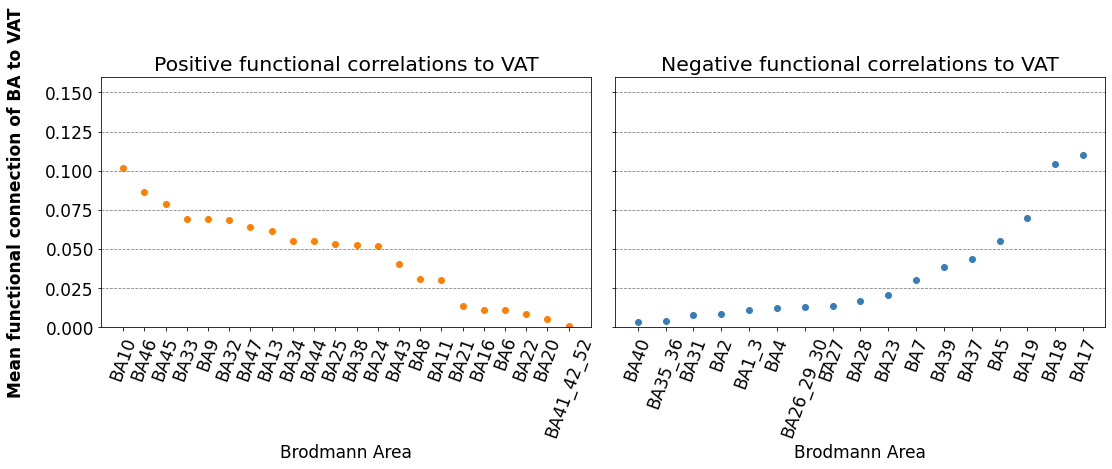

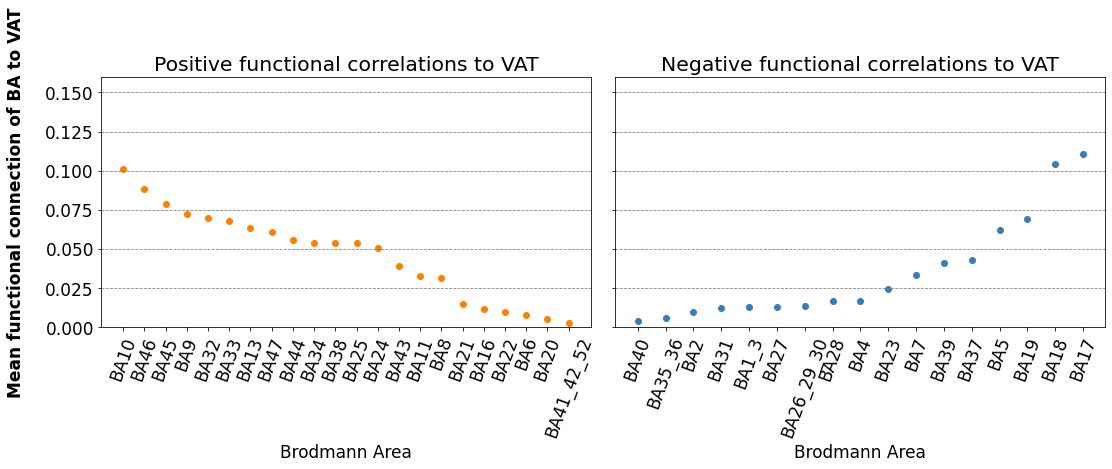

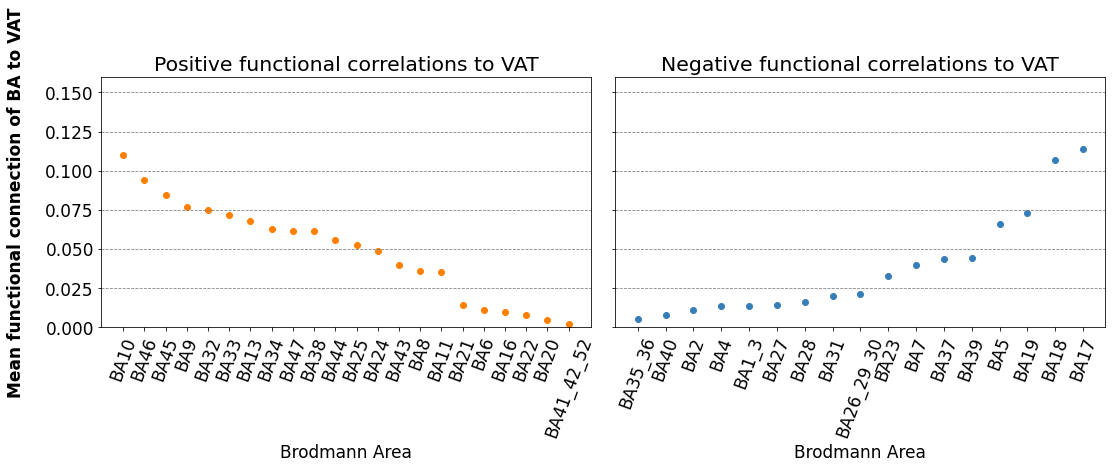

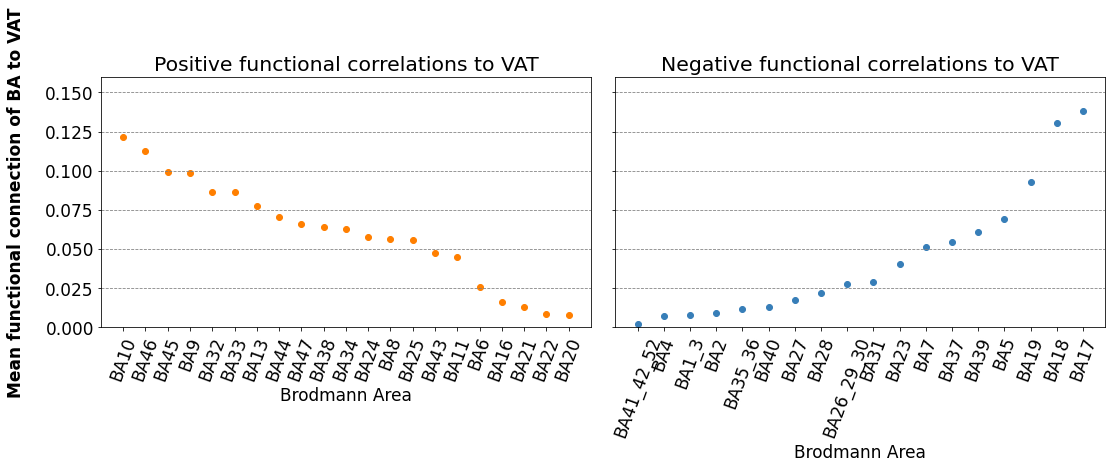

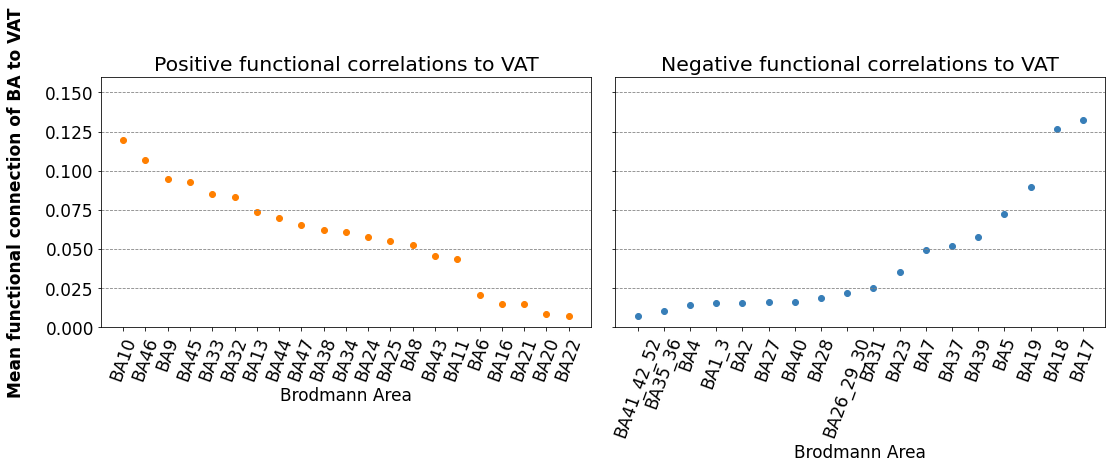

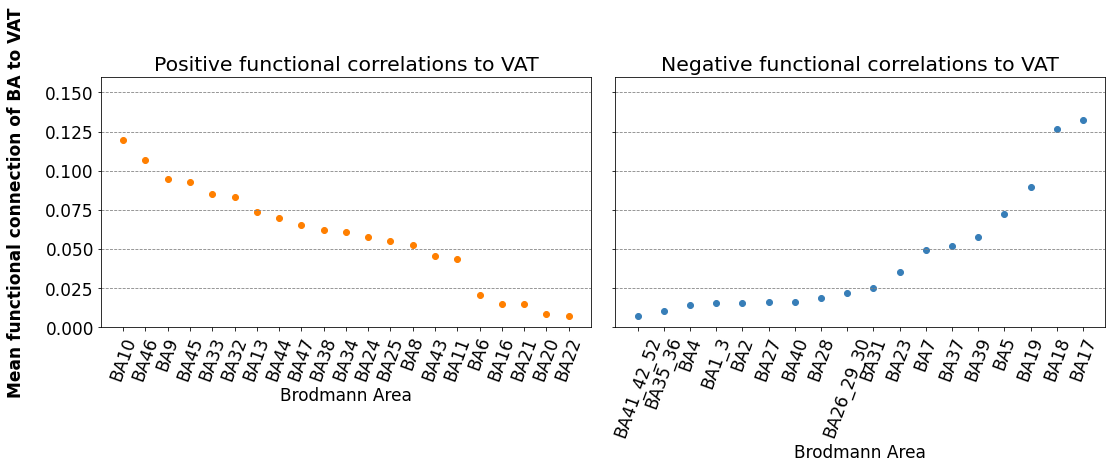

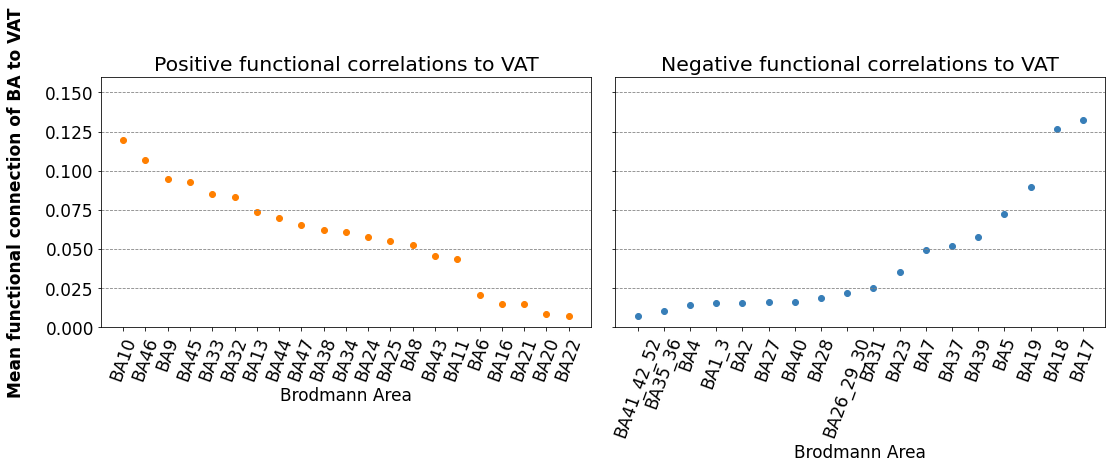

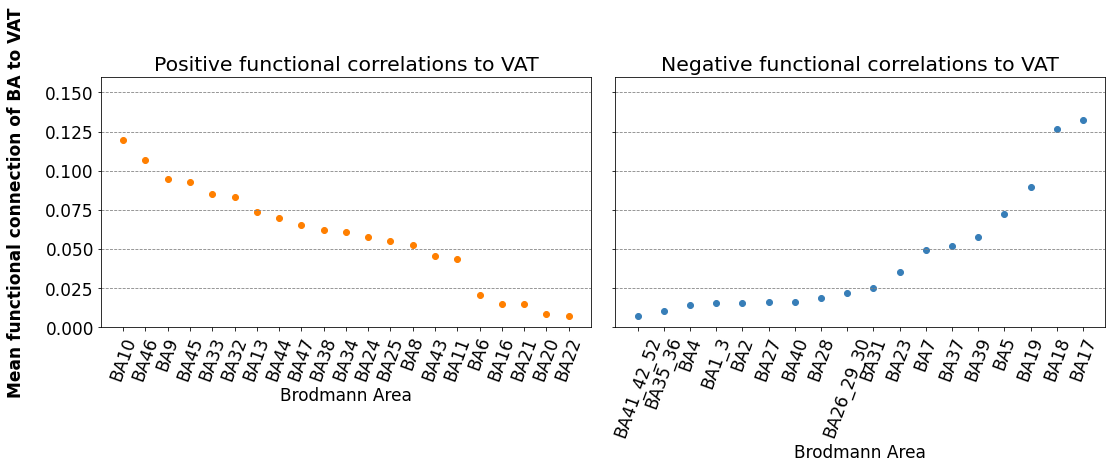

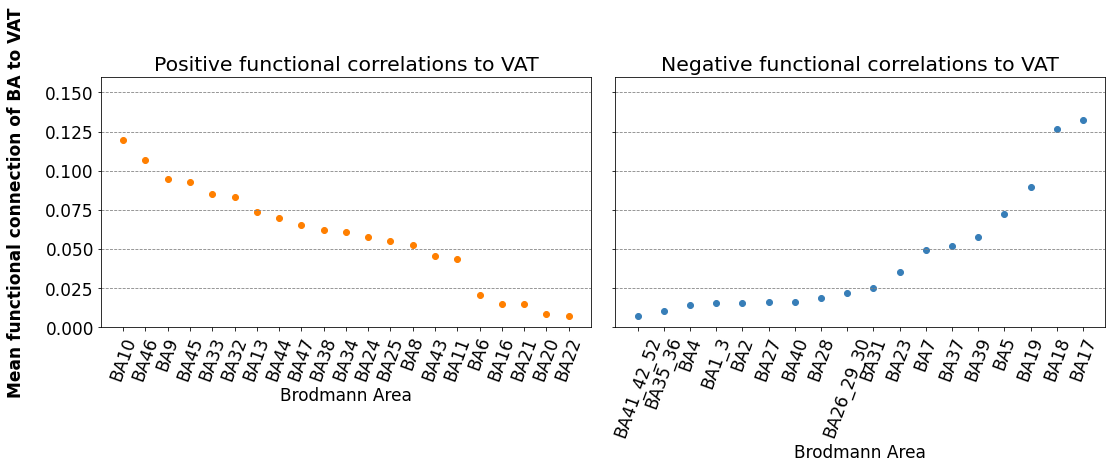

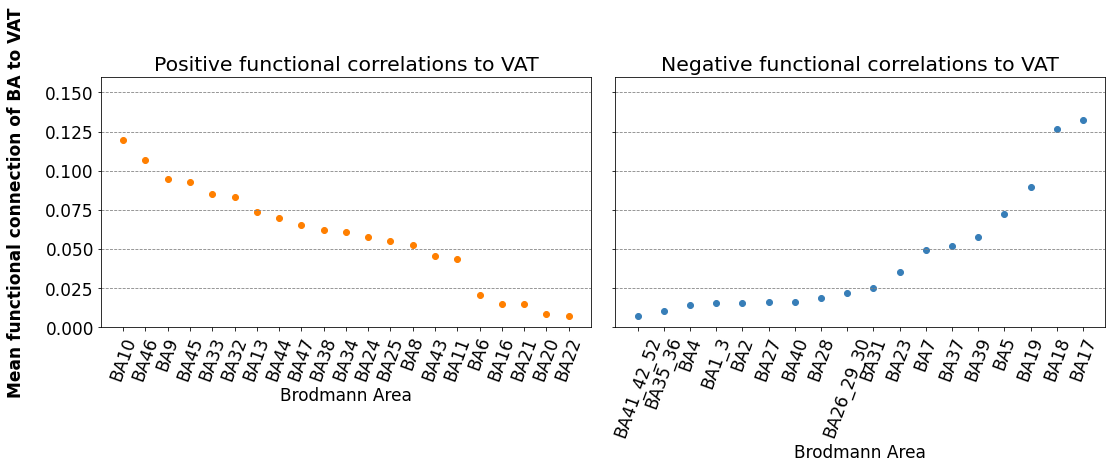

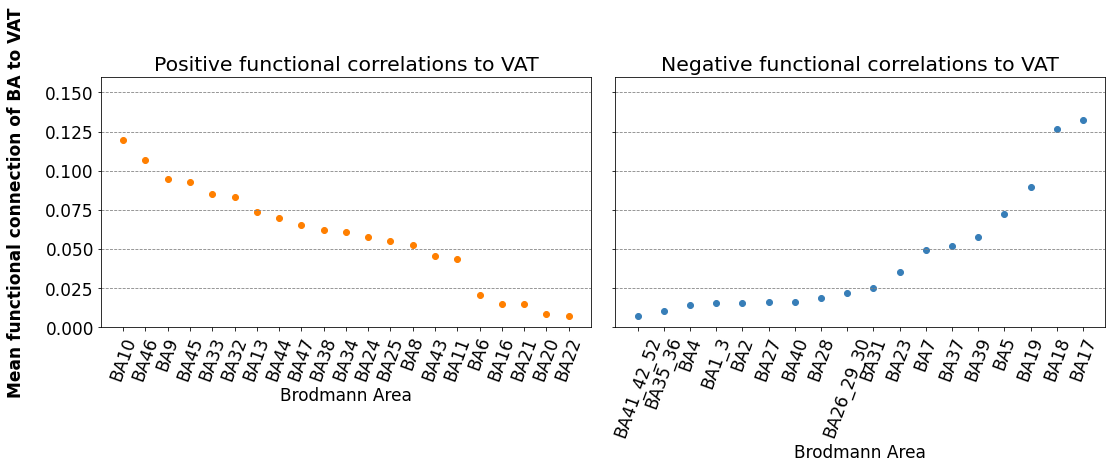

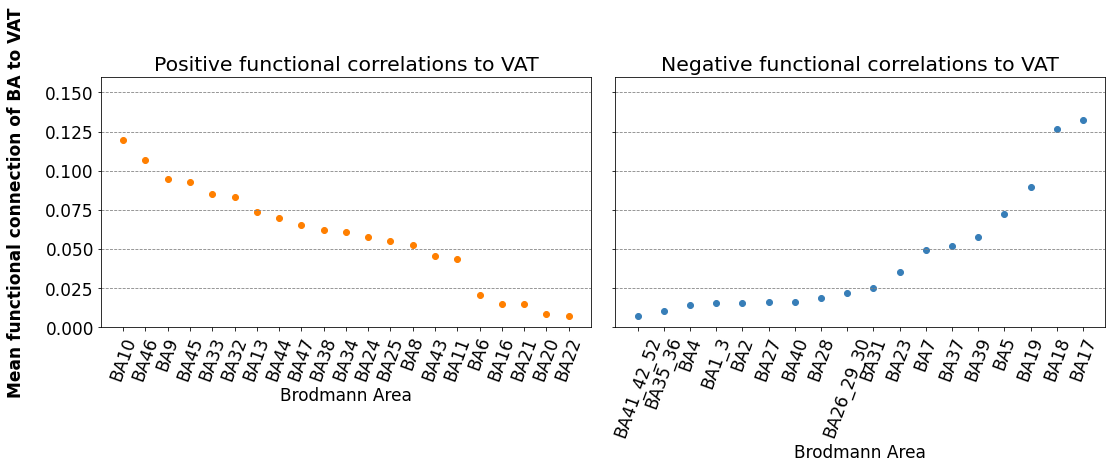

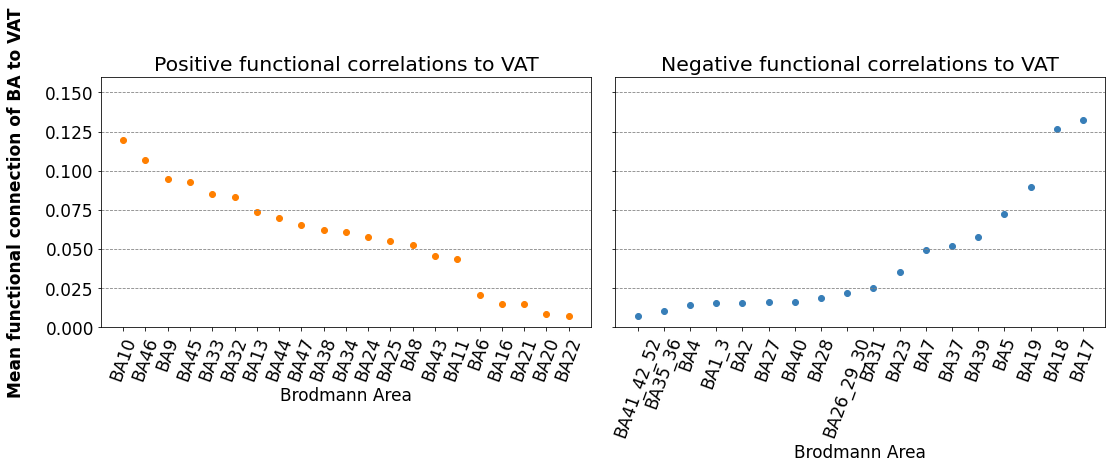

In [11]:
plot_funk_profiles('Pat1.pkl',parcellation_path_Brodmann)

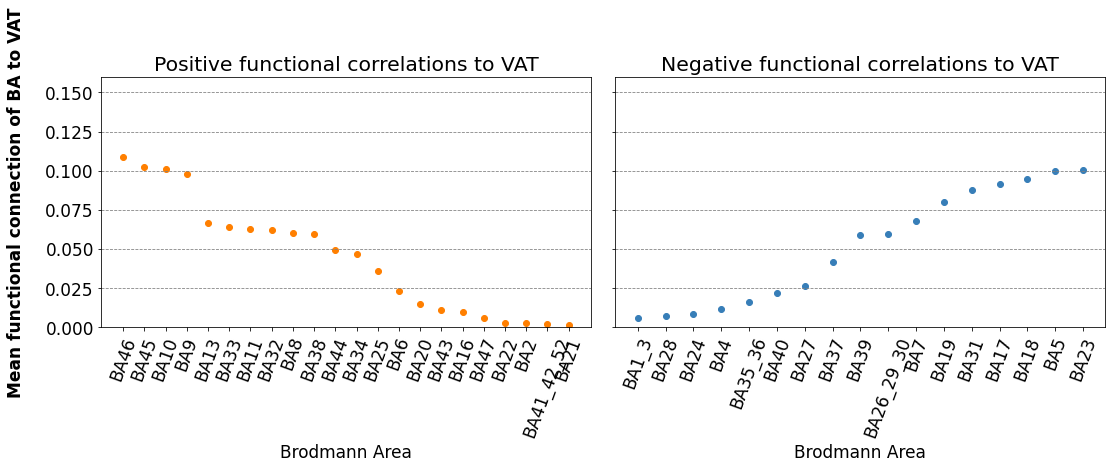

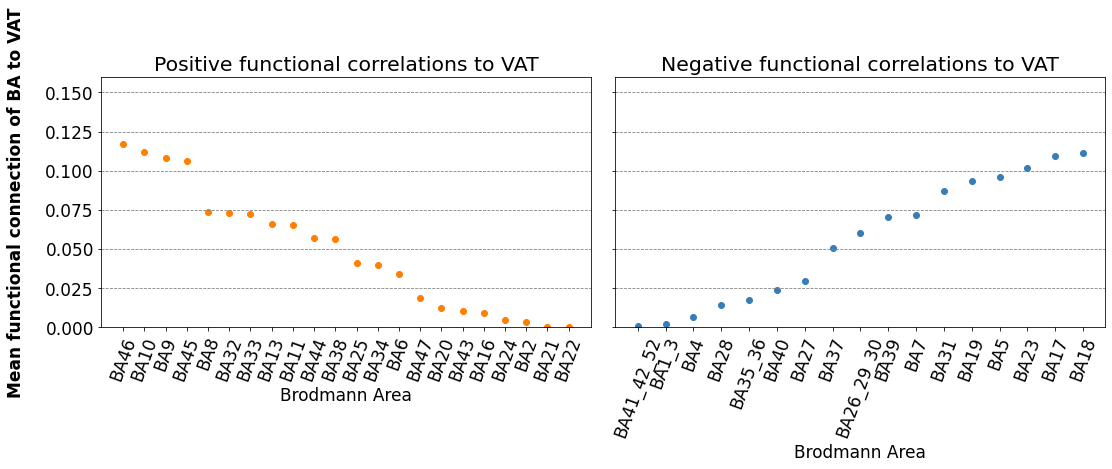

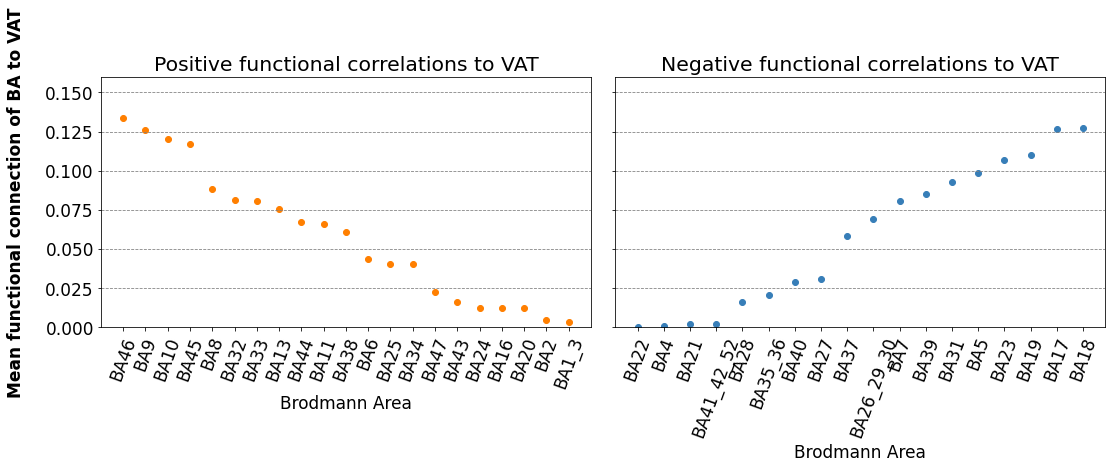

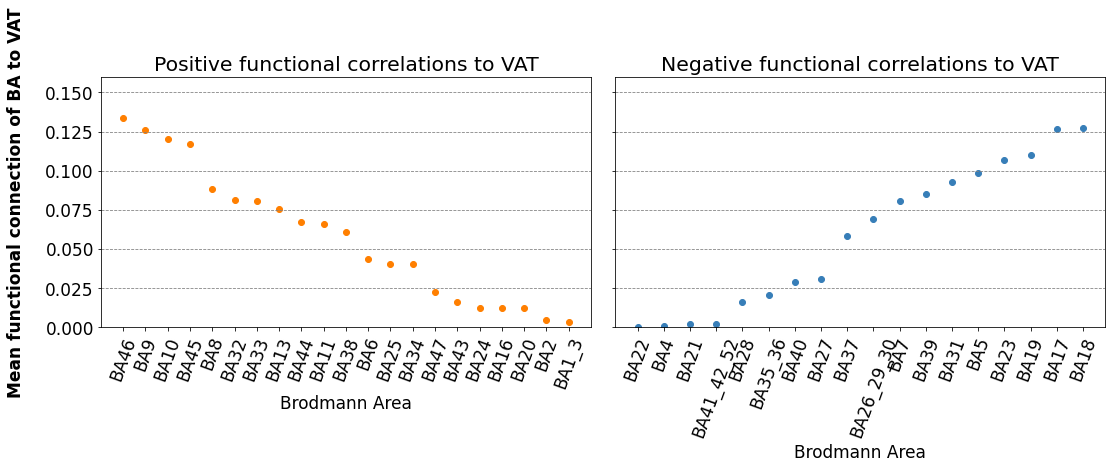

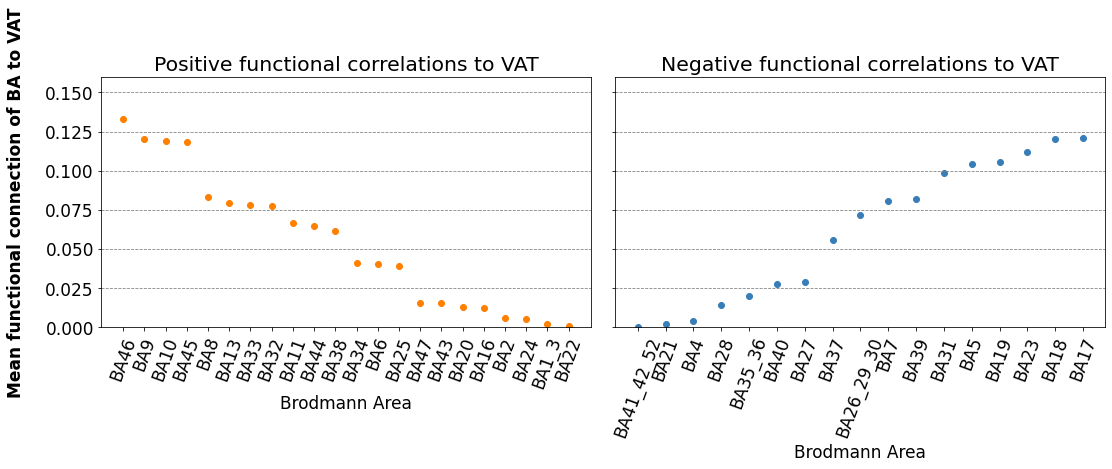

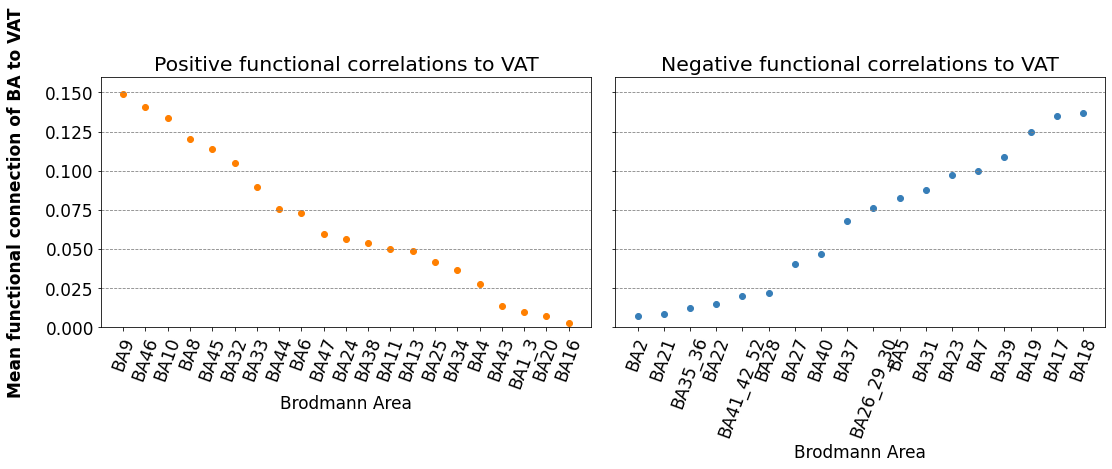

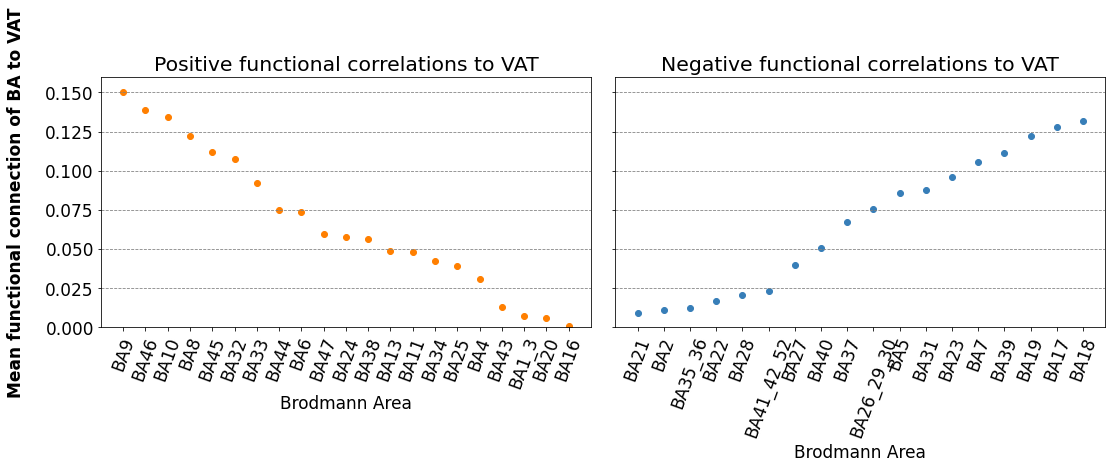

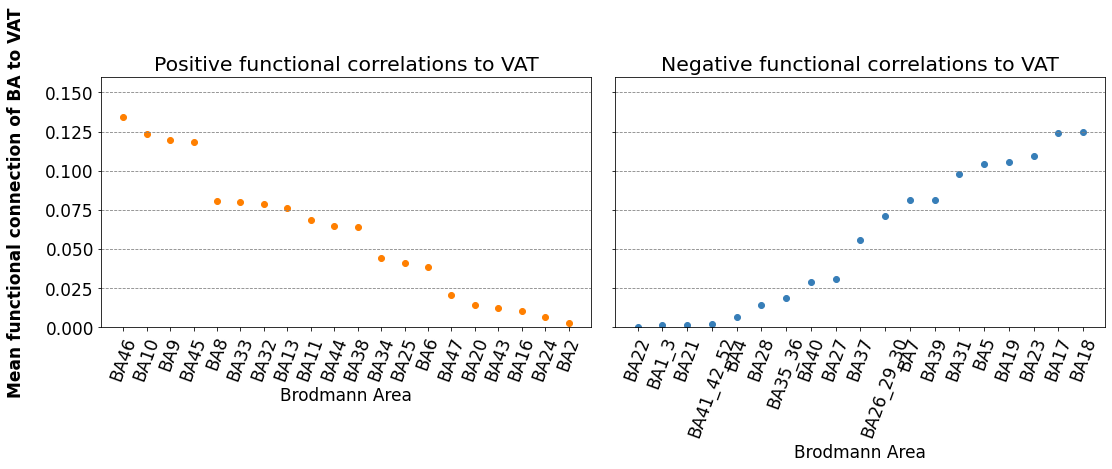

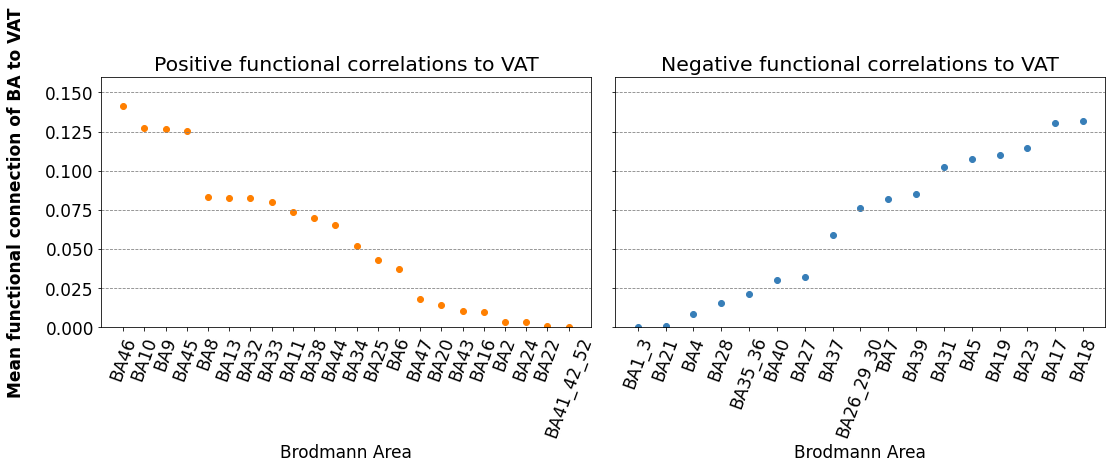

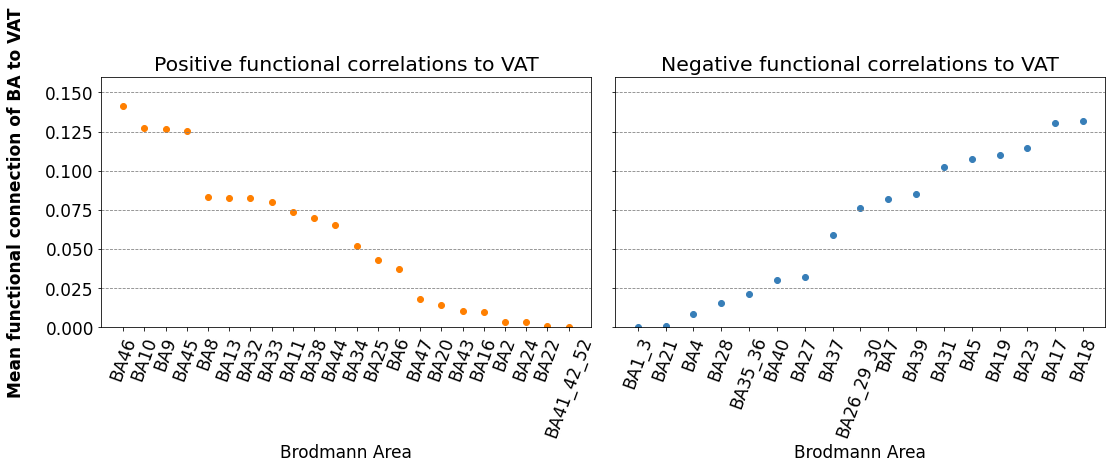

In [12]:
plot_funk_profiles('Pat3.pkl',parcellation_path_Brodmann)